In [12]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设 置 字 体
plt.rcParams["axes.unicode_minus"]=False #该 语 句 解 决 图 像中 的 “ -” 负 号 的 乱 码 问 题
%matplotlib inline
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
## 问题一
DFA_CS_data = pd.read_excel("../Data/DFA-CS.xlsx")
DFA_CE_data = pd.read_excel("../Data/DFA-CE.xlsx")
DFA_LG_data = pd.read_excel("../Data/DFA-LG.xlsx")
### 箱线图检测异常值
fig, ax = plt.subplots()
data1 = DFA_CE_data.loc[0].values[1:]
data2 = DFA_CE_data.loc[1].values[1:]
data3 = DFA_CE_data.loc[2].values[1:]
data4 = DFA_CE_data.loc[3].values[1:]
data = [data1,data2,data3,data4]
ax.boxplot(data)
ax.set_xticklabels(['Tar', 'Water', 'Char', 'Syngas'])
plt.savefig("../Figure/问题1/DFA_CE_box.png")

fig, ax = plt.subplots()
data1 = DFA_CS_data.loc[0].values[1:]
data2 = DFA_CS_data.loc[1].values[1:]
data3 = DFA_CS_data.loc[2].values[1:]
data4 = DFA_CS_data.loc[3].values[1:]
data = [data1,data2,data3,data4]
ax.boxplot(data)
ax.set_xticklabels(['Tar', 'Water', 'Char', 'Syngas'])
plt.savefig("../Figure/问题1/DFA_CS_box.png")
fig, ax = plt.subplots()
data1 = DFA_LG_data.loc[0].values[1:]
data2 = DFA_LG_data.loc[1].values[1:]
data3 = DFA_LG_data.loc[2].values[1:]
data4 = DFA_LG_data.loc[3].values[1:]
data = [data1,data2,data3,data4]
ax.boxplot(data)
ax.set_xticklabels(['Tar', 'Water', 'Char', 'Syngas'])
plt.savefig("../Figure/问题1/DFA_LG_box.png")
plt.show()

data_index = DFA_LG_data.columns.values[1:]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# 在每个子图中绘制散点图
axs[0, 0].scatter(x=data_index, y=DFA_LG_data.loc[0].values[1:])
axs[0, 0].set_title('Tar')

axs[0, 1].scatter(x=data_index, y=DFA_LG_data.loc[1].values[1:])
axs[0, 1].set_title('Water')

axs[1, 0].scatter(x=data_index, y=DFA_LG_data.loc[2].values[1:])
axs[1, 0].set_title('Char')

axs[1, 1].scatter(x=data_index, y=DFA_LG_data.loc[3].values[1:])
axs[1, 1].set_title('Syngas')

# 调整布局
plt.tight_layout()

# 保存图形
plt.savefig("../Figure/问题1/Scatter/DFA_LG_scatter_subplots.png")

# 显示图形
plt.show()
# 堆叠图
def stackbar(data):

    plt.figure(figsize=(15, 8))
    categories = data.columns.values
    # 创建堆叠图
    fig, ax = plt.subplots()

    # 绘制第一个变量的条形图，并设置label参数
    bar1 = ax.bar(categories, data[category1], label='Tar',color="#AB9A6F")

    # 绘制第二个变量的条形图，并设置bottom参数
    bar2 = ax.bar(categories, data[category2], bottom=Tar, label='Water',color="#D6E3B7")

    # 绘制第三个变量的条形图，并设置bottom参数
    bar3 = ax.bar(categories, data[category3], bottom=[i+j for i, j in zip(Tar,Water)], label='Char', color='#95A96A')

    bar4 = ax.bar(categories, data[categroy4], bottom=[i+j+k for i,j,k in zip(Tar,Water, Char)], label='Syngas', color="#45602D")
    # 添加图例
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # 设置标题和轴标签
    ax.set_xlabel('DFA/CE')
    ax.set_ylabel('Yields(wt.%, daf)')
    # 调整图表布局，防止注释遮挡图表内容
    plt.tight_layout()
# 展示图表
plt.savefig("../Figure/DFA_CE_bar.png")

plt.figure(figsize=(15, 8))
categories = DFA_CS_data.columns.values[1:]
Tar = DFA_CS_data.loc[0].values[1:]
Water = DFA_CS_data.loc[1].values[1:]
Char = DFA_CS_data.loc[2].values[1:]
Syngas = DFA_CS_data.loc[3].values[1:]
# 创建堆叠图
fig, ax = plt.subplots()

# 绘制第一个变量的条形图，并设置label参数
bar1 = ax.bar(categories, Tar, label='Tar',color="#AB9A6F")

# 绘制第二个变量的条形图，并设置bottom参数
bar2 = ax.bar(categories, Water, bottom=Tar, label='Water',color="#D6E3B7")

# 绘制第三个变量的条形图，并设置bottom参数
bar3 = ax.bar(categories, Char, bottom=[i+j for i, j in zip(Tar,Water)], label='Char', color='#95A96A')

bar4 = ax.bar(categories, Syngas, bottom=[i+j+k for i,j,k in zip(Tar,Water, Char)], label='Syngas', color="#45602D")
# 添加图例
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# 设置标题和轴标签
ax.set_xlabel('DFA/CE')
ax.set_ylabel('Yields(wt.%, daf)')
# 调整图表布局，防止注释遮挡图表内容
plt.tight_layout()
# 展示图表
plt.savefig("../Figure/DFA_CS_bar.png")
plt.figure(figsize=(15, 8))
categories = DFA_LG_data.columns.values[1:]
Tar = DFA_LG_data.loc[0].values[1:]
Water = DFA_LG_data.loc[1].values[1:]
Char = DFA_LG_data.loc[2].values[1:]
Syngas = DFA_LG_data.loc[3].values[1:]
# 创建堆叠图
fig, ax = plt.subplots()

# 绘制第一个变量的条形图，并设置label参数
bar1 = ax.bar(categories, Tar, label='Tar',color="#AB9A6F")

# 绘制第二个变量的条形图，并设置bottom参数
bar2 = ax.bar(categories, Water, bottom=Tar, label='Water',color="#D6E3B7")

# 绘制第三个变量的条形图，并设置bottom参数
bar3 = ax.bar(categories, Char, bottom=[i+j for i, j in zip(Tar,Water)], label='Char', color='#95A96A')

bar4 = ax.bar(categories, Syngas, bottom=[i+j+k for i,j,k in zip(Tar,Water, Char)], label='Syngas', color="#45602D")
# 添加图例
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# 设置标题和轴标签
ax.set_xlabel('DFA/CE')
ax.set_ylabel('Yields(wt.%, daf)')
# 调整图表布局，防止注释遮挡图表内容
plt.tight_layout()
# 展示图表
plt.savefig("../Figure/DFA_LG_bar.png")
from scipy.stats import levene

# 示例数据（替换成你的实际数据）
group1 = DFA_CS_data.loc[0].values[1:]
group2 = DFA_CS_data.loc[1].values[1:]
group3 = DFA_CS_data.loc[2].values[1:]
group4 = DFA_CS_data.loc[3].values[1:]

# 进行方差齐性检验
statistic, p_value = levene(group1, group2, group3, group4, center='mean')

# 输出检验结果
print("Levene统计量:", statistic)
print("p值:", p_value)

# 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，说明四组的方差不齐")
else:
    print("接受原假设，说明四组的方差齐性没有显著差异")
from scipy.stats import levene

# 示例数据（替换成你的实际数据）
group1 = DFA_CE_data.loc[0].values[1:]
group2 = DFA_CE_data.loc[1].values[1:]
group3 = DFA_CE_data.loc[2].values[1:]
group4 = DFA_CE_data.loc[3].values[1:]

# 进行方差齐性检验
statistic, p_value = levene(group1, group2, group3, group4, center='mean')

# 输出检验结果
print("Levene统计量:", statistic)
print("p值:", p_value)

# 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，说明四组的方差不齐")
else:
    print("接受原假设，说明四组的方差齐性没有显著差异")
from scipy.stats import levene

# 示例数据（替换成你的实际数据）
group1 = DFA_CS_data.loc[0].values[1:]
group2 = DFA_CS_data.loc[1].values[1:]
group3 = DFA_CS_data.loc[2].values[1:]
group4 = DFA_CS_data.loc[3].values[1:]

# 进行方差齐性检验
statistic, p_value = levene(group1, group2, group3, group4, center='mean')

# 输出检验结果
print("Levene统计量:", statistic)
print("p值:", p_value)

# 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，说明四组的方差不齐")
else:
    print("接受原假设，说明四组的方差齐性没有显著差异")
group1 = DFA_CS_data.loc[0].values[1:]
group2 = DFA_CS_data.loc[1].values[1:]
group3 = DFA_CS_data.loc[2].values[1:]
group4 = DFA_CS_data.loc[3].values[1:]

from scipy.stats import kruskal

# 执行Kruskal-Wallis方差分析
statistic, p_value = kruskal(group1, group2, group3, group4)

# 输出检验结果
print("Kruskal-Wallis统计量:", statistic)
print("p值:", p_value)

# 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，说明至少有两组的中位数存在显著差异")
else:
    print("接受原假设，说明各组中位数没有显著差异")
    
 
group1 = DFA_CE_data.loc[0].values[1:]
group2 = DFA_CE_data.loc[1].values[1:]
group3 = DFA_CE_data.loc[2].values[1:]
group4 = DFA_CE_data.loc[3].values[1:]

# 执行Kruskal-Wallis方差分析
statistic, p_value = kruskal(group1, group2, group3, group4)

# 输出检验结果
print("Kruskal-Wallis统计量:", statistic)
print("p值:", p_value)

# 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，说明至少有两组的中位数存在显著差异")
else:
    print("接受原假设，说明各组中位数没有显著差异")
    
group1 = DFA_LG_data.loc[0].values[1:]
group2 = DFA_LG_data.loc[1].values[1:]
group3 = DFA_LG_data.loc[2].values[1:]
group4 = DFA_LG_data.loc[3].values[1:]

statistic, p_value = kruskal(group1, group2, group3, group4)

# 输出检验结果
print("Kruskal-Wallis统计量:", statistic)
print("p值:", p_value)

# 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，说明至少有两组的中位数存在显著差异")
else:
    print("接受原假设，说明各组中位数没有显著差异")

group1 = DFA_CS_data.loc[0].values[1:]
group2 = DFA_CS_data.loc[1].values[1:]
group3 = DFA_CS_data.loc[2].values[1:]
group4 = DFA_CS_data.loc[3].values[1:]

df_CS = pd.DataFrame(data={'DFA/CS':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1], 'Tar':group1,'Water':group2,'Char':group3,'Syngas':group4})
df_CS.corr()
fig, ax = plt.subplots(figsize=(10, 10),facecolor='w')
# 指定颜色带的色系
sns.heatmap(df_CS.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.title('Correlation heat map')
plt.savefig("../Figure/问题1/热力图/CS")
plt.show()
group1 = DFA_CE_data.loc[0].values[1:]
group2 = DFA_CE_data.loc[1].values[1:]
group3 = DFA_CE_data.loc[2].values[1:]
group4 = DFA_CE_data.loc[3].values[1:]

df_CE = pd.DataFrame(data={'DFA/CE':[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1], 'Tar':group1,'Water':group2,'Char':group3,'Syngas':group4})
df_CE.corr()
fig, ax = plt.subplots(figsize=(10, 10),facecolor='w')
# 指定颜色带的色系
sns.heatmap(df_CE.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.title('Correlation heat map')
plt.savefig("../Figure/问题1/热力图/CE")
plt.show()
group1 = DFA_LG_data.loc[0].values[1:]
group2 = DFA_LG_data.loc[1].values[1:]
group3 = DFA_LG_data.loc[2].values[1:]
group4 = DFA_LG_data.loc[3].values[1:]

df_LG = pd.DataFrame(data={'DFA/LG':[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1], 'Tar':group1,'Water':group2,'Char':group3,'Syngas':group4})
df_LG.corr()
fig, ax = plt.subplots(figsize=(10, 10),facecolor='w')
# 指定颜色带的色系
sns.heatmap(df_LG.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.title('Correlation heat map')
plt.savefig("../Figure/问题1/热力图/LG")
plt.show()
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 示例数据（替换成你的实际数据）
# 将数据转换为二维数组
name = ['Tar', 'Water', 'Char', 'Syngas']

for i,key in enumerate(name):
    x = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1])
    y = DFA_CS_data.loc[i].values[1:]
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # 创建多项式特征
    degree = 2  # 多项式的次数
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)

    # 使用线性回归拟合多项式特征
    model = LinearRegression()
    model.fit(x_poly, y)

    # 预测
    # x_new = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    # x_new_poly = poly_features.transform(x_new)
    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # 打印评估指标
    print(f"均方误差 (MSE): {mse}")
    print(f"决定系数 (R-squared): {r2}")
    coefficients = model.coef_[0]
    print(f"多项式回归的系数: {coefficients}")
    intercept = model.intercept_
    print(f"多项式回归的常数项 (intercept): {intercept}")
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # 可视化结果
    axs[0].scatter(x, y, label='Real Data')
    axs[0].plot(x, y_pred, color='red', label=f'Polynomial regression ({degree} degree）')
    axs[0].set_title('DFA/CS_{} Curve fitting'.format(key))
    axs[0].legend()
    # plt.savefig("../Figure/问题1/拟合曲线/")
    residuals = y - y_pred
    axs[1].scatter(x, residuals)
    axs[1].axhline(y=0, color='black', linestyle='--', linewidth=2)
    axs[1].set_title('DFA/CS_{} Residual plot'.format(key))
    plt.savefig("../Figure/问题1/拟合曲线/DFA_CS/{}.png".format(key))
    plt.show()

## 问题二

In [24]:
DFA_CS_gas = pd.read_excel("../Data/DFA_CS_gas.xlsx")
DFA_CE_gas = pd.read_excel("../Data/DFA_CE_gas.xlsx")
DFA_LG_gas = pd.read_excel("../Data/DFA_LG_gas.xlsx")
DFA_CE_gas.set_index(DFA_CE_gas['DFA/CE'], inplace=True)
DFA_CE_gas.drop(columns='DFA/CE', inplace=True)
DFA_CS_gas.set_index(DFA_CS_gas['DFA/CS'], inplace=True)
DFA_CS_gas.drop(columns='DFA/CS', inplace=True)
DFA_LG_gas.set_index(DFA_LG_gas['DFA/LG'], inplace=True)
DFA_LG_gas.drop(columns='DFA/LG', inplace=True)
sns.heatmap(DFA_LG_gas.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.title('CE Correlation heat map')
#plt.savefig("../Figure/问题1/热力图/CS")
plt.show()
fig, ax = plt.subplots()
ax.boxplot(DFA_CS_gas)
ax.set_xticklabels(['H2', 'CO', 'CO2', 'CH4', 'C2H6', 'C3H8', 'C3H6', 'C2H4', 'C4H10'])
plt.savefig("../Figure/问题2/DFA_CS_gas_box.png")
plt.show()

fig, ax = plt.subplots()
ax.boxplot(DFA_CE_gas)
ax.set_xticklabels(['H2', 'CO', 'CO2', 'CH4', 'C2H6'])
plt.savefig("../Figure/问题2/DFA_CE_gas_box.png")
plt.show()

fig, ax = plt.subplots()
ax.boxplot(DFA_LG_gas)
ax.set_xticklabels(['H2', 'CO', 'CO2', 'CH4', 'C2H6'])
plt.savefig("../Figure/问题2/DFA_LG_gas_box.png")
plt.show()


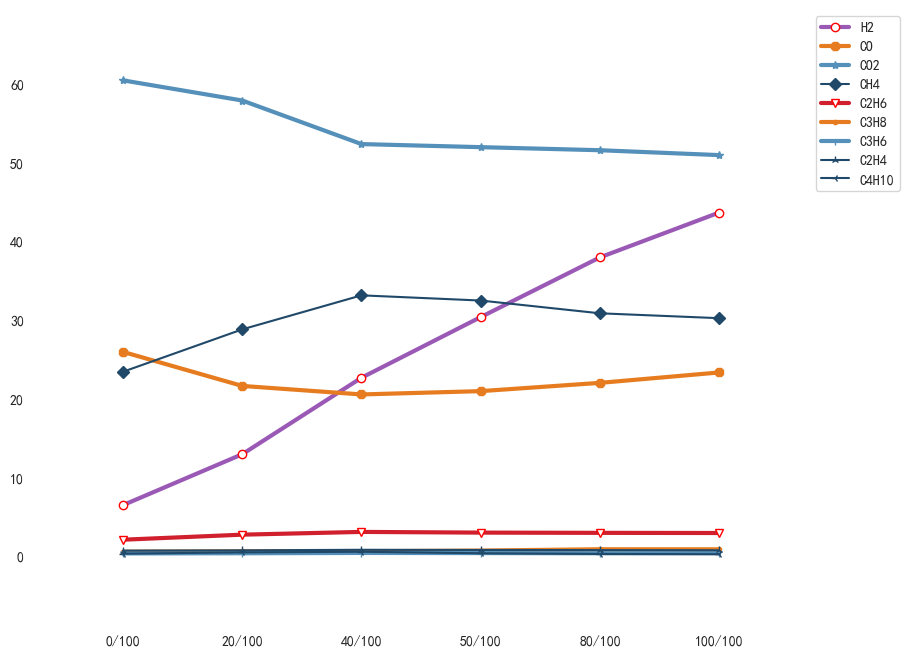

In [75]:
styles = plt.style.available
plt.rcParams['axes.facecolor'] = 'white'
# 设置背景线条样式
plt.figure(figsize=(10,8))
plt.grid(linestyle='--')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['H2'].values, '-', label="H2", linewidth=3, marker='o', mec='r', mfc='w',color='#9B59B6')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CO'].values, '-', label="CO", color='#E67C1F',linewidth=3, marker='8')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CO2'].values, '-', label="CO2", color='#5490B9',linewidth=3, marker='*',)
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CH4'].values, '-', label="CH4", color='#204969',marker='D')

plt.plot(DFA_CS_gas.index, DFA_CS_gas['C2H6'].values, '-', label="C2H6", linewidth=3, marker='v', mec='r', mfc='w',color='#D0202D')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['C3H8'].values, '-', label="C3H8", color='#E67C1F',linewidth=3, marker='.')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['C3H6'].values, '-', label="C3H6", color='#5490B9',linewidth=3, marker='1',)
plt.plot(DFA_CS_gas.index, DFA_CS_gas['C2H4'].values, '-', label="C2H4", color='#204969',marker='2')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['C4H10'].values, '-', label="C4H10", color='#204969',marker='3')
plt.margins(0.15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("../Figure/问题二/DFA_CS_gas_plot.png")

styles = plt.style.available
plt.rcParams['axes.facecolor'] = 'white'
# 设置背景线条样式
plt.figure(figsize=(10,8))
plt.grid(linestyle='--')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['H2'].values, '-', label="H2", linewidth=3, marker='o', mec='r', mfc='w',color='#9B59B6')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CO'].values, '-', label="CO", color='#E67C1F',linewidth=3, marker='8')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CO2'].values, '-', label="CO2", color='#5490B9',linewidth=3, marker='*',)
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CH4'].values, '-', label="CH4", color='#204969',marker='D')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['C2H6'].values, '-', label="C2H6", linewidth=3, marker='v', mec='r', mfc='w',color='#D0202D')
plt.margins(0.15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("../Figure/问题二/DFA_CE_gas_plot.png")


styles = plt.style.available
plt.rcParams['axes.facecolor'] = 'white'
# 设置背景线条样式
plt.figure(figsize=(10,8))
plt.grid(linestyle='--')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['H2'].values, '-', label="H2", linewidth=3, marker='o', mec='r', mfc='w',color='#9B59B6')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CO'].values, '-', label="CO", color='#E67C1F',linewidth=3, marker='8')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CO2'].values, '-', label="CO2", color='#5490B9',linewidth=3, marker='*',)
plt.plot(DFA_CS_gas.index, DFA_CS_gas['CH4'].values, '-', label="CH4", color='#204969',marker='D')
plt.plot(DFA_CS_gas.index, DFA_CS_gas['C2H6'].values, '-', label="C2H6", linewidth=3, marker='o', mec='r', mfc='w',color='#D0202D')
plt.margins(0.15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("../Figure/问题二/DFA_LG_gas_plot.png")

In [8]:
CE = pd.read_excel("../Data/3CE.xlsx")
LG = pd.read_excel("../Data/3LG.xlsx")
CE_gas = pd.read_excel("../Data/3CEgas.xlsx")
LG_gas = pd.read_excel("../Data/3LGgas.xlsx")

In [262]:
CE_gas.iloc[4]

Unnamed: 0    C2H6
0.2          13.80
0.4           8.60
0.5           4.40
0.8           3.40
1             3.20
Name: 4, dtype: object

In [287]:
all_data

array([26.6, 47.8, 55.6, 65.8, 57.9, 0.67, 0.72, 0.78, 0.81, 0.79],
      dtype=object)

#### 方差齐性检验

In [297]:
from scipy.stats import levene

# 示例数据（替换成你的实际数据）
group1 = CE_gas.iloc[0].values[1:]
group2 = CE_gas.iloc[1].values[1:]
group3 = CE_gas.iloc[2].values[1:]
group4 = CE_gas.iloc[3].values[1:]
group5 = CE_gas.iloc[4].values[1:]

CE_data = [group1, group2,group3,group4,group5]
# 进行方差齐性检验
colu = ['H2', 'CO', 'CO2', 'CH4', 'C2H6']
group1 = LG_gas.iloc[0].values[1:]
group2 = LG_gas.iloc[1].values[1:]
group3 = LG_gas.iloc[2].values[1:]
group4 = LG_gas.iloc[3].values[1:]
group5 = LG_gas.iloc[4].values[1:]

LG_data = [group1,group2,group3,group4,group5]
# 进行方差齐性检验
for i in range(5):
    print(colu[i])
    statistic, p_value = levene(CE_data[i],LG_data[i], center='mean')

    # 输出检验结果
    print("Levene统计量:", statistic)
    print("p值:", p_value)

    # 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
    alpha = 0.05
    if p_value < alpha:
        print("拒绝原假设，说明五组的方差不齐")
    else:
        print("接受原假设，说明五组的方差齐性没有显著差异")
    
from scipy.stats import levene

# 示例数据（替换成你的实际数据）
group1 = CE.iloc[0].values[1:]
group2 = CE.iloc[1].values[1:]
group3 = CE.iloc[2].values[1:]
group4 = CE.iloc[3].values[1:]

CE_data = [group1, group2,group3,group4]
# 进行方差齐性检验
colu = ['Tar','Water','Char','Syngas']
group1 = LG.iloc[0].values[1:]
group2 = LG.iloc[1].values[1:]
group3 = LG.iloc[2].values[1:]
group4 = LG.iloc[3].values[1:]

LG_data = [group1,group2,group3,group4]
# 进行方差齐性检验
for i in range(4):
    print(colu[i])
    statistic, p_value = levene(CE_data[i],LG_data[i], center='mean')

    # 输出检验结果
    print("Levene统计量:", statistic)
    print("p值:", p_value)

    # 判断是否拒绝原假设（p值小于显著性水平，通常设为0.05）
    alpha = 0.05
    if p_value < alpha:
        print("拒绝原假设，说明五组的方差不齐")
    else:
        print("接受原假设，说明五组的方差齐性没有显著差异")
    


H2
Levene统计量: 7.591837680569261
p值: 0.02485345153864234
拒绝原假设，说明五组的方差不齐
CO
Levene统计量: 0.7963263108806375
p值: 0.3982403449386114
接受原假设，说明五组的方差齐性没有显著差异
CO2
Levene统计量: 0.0013909805064389346
p值: 0.9711629825698203
接受原假设，说明五组的方差齐性没有显著差异
CH4
Levene统计量: 6.031551580217611
p值: 0.03956960925668939
拒绝原假设，说明五组的方差不齐
C2H6
Levene统计量: 15.217404955772937
p值: 0.0045385741890130405
拒绝原假设，说明五组的方差不齐
Tar
Levene统计量: 0.26935536558249945
p值: 0.6118708948311342
接受原假设，说明五组的方差齐性没有显著差异
Water
Levene统计量: 0.8034552341814766
p值: 0.38521625705943535
接受原假设，说明五组的方差齐性没有显著差异
Char
Levene统计量: 3.261653991431309
p值: 0.09245722380095692
接受原假设，说明五组的方差齐性没有显著差异
Syngas
Levene统计量: 0.07079796747681544
p值: 0.7940569803653379
接受原假设，说明五组的方差齐性没有显著差异


Tar
Levene统计量: 0.26935536558249945
p值: 0.6118708948311342
接受原假设，说明五组的方差齐性没有显著差异
Water
Levene统计量: 0.8034552341814766
p值: 0.38521625705943535
接受原假设，说明五组的方差齐性没有显著差异
Char
Levene统计量: 3.261653991431309
p值: 0.09245722380095692
接受原假设，说明五组的方差齐性没有显著差异
Syngas
Levene统计量: 0.07079796747681544
p值: 0.7940569803653379
接受原假设，说明五组的方差齐性没有显著差异


方差不齐，使用Welch’s ANOVA

In [291]:
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def kruskal_test(data1, data2):

    all_data = np.concatenate([data1, data2])

    # Create labels for the groups
    labels = ['data1'] * len(data1) + ['data2'] * len(data2)
    # 判断是否存在显著差异
    kruskal_result = kruskal(data1, data2)

    # Check if there is a significant difference
    if kruskal_result.pvalue < 0.05:
        print("Kruskal-Wallis test: Reject the null hypothesis, significant difference exists")

        # Perform post hoc Tukey's HSD test
        tukey_results = pairwise_tukeyhsd(list(all_data), labels, alpha=0.05)

        # Display post hoc results
        print("Tukey's HSD post hoc test results:")
        print(tukey_results)

    else:
        print("Kruskal-Wallis test: Fail to reject the null hypothesis, no significant difference")


H2
Kruskal-Wallis test: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    CE     LG  -49.986 0.0001 -65.3956 -34.5764   True
------------------------------------------------------
CH4
Kruskal-Wallis test: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    CE     LG   29.302   0.0 26.489 32.115   True
-------------------------------------------------
C2H6
Kruskal-Wallis test: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------

方差无显著差异，使用f检验

In [295]:
from scipy.stats import f_oneway
def ANOVA(data1, data2):
    anova_result = f_oneway(data1, data2)
    # 打印方差分析结果
    print("One-Way ANOVA p-value:", anova_result.pvalue)

    # 判断是否存在显著差异
    alpha = 0.05
    if anova_result.pvalue < alpha:
        print("One-Way ANOVA: Reject the null hypothesis, significant difference exists")
        # 将数据整合成一列
        all_data = np.concatenate([data1, data2])

        # Create labels for the groups
        labels = ['data1'] * len(data1) + [data2] * len(data2)

        # 执行 Tukey's HSD 进行事后多重比较
        tukey_results = pairwise_tukeyhsd(list(all_data), labels, alpha=alpha)

        # 显示事后多重比较结果
        print("Tukey's HSD post hoc test results:")
        print(tukey_results)

    else:
        print("One-Way ANOVA: Cannot reject the null hypothesis, no significant difference")


anova_result = f_oneway(CE_data[2], LG_data[2])
# 打印方差分析结果
print("One-Way ANOVA p-value:", anova_result.pvalue)

# 判断是否存在显著差异
alpha = 0.05
if anova_result.pvalue < alpha:
    print("One-Way ANOVA: Reject the null hypothesis, significant difference exists")

    # 将数据整合成一列
    all_data = np.concatenate([CE_data[2], LG_data[2]])

    # Create labels for the groups
    labels = ['CE'] * len(CE_data[2]) + ['LG'] * len(LG_data[2])

    # 执行 Tukey's HSD 进行事后多重比较
    tukey_results = pairwise_tukeyhsd(list(all_data), labels, alpha=alpha)

    # 显示事后多重比较结果
    print("Tukey's HSD post hoc test results:")
    print(tukey_results)

else:
    print("One-Way ANOVA: Cannot reject the null hypothesis, no significant difference")

CO
One-Way ANOVA p-value: 0.00136153584120892
One-Way ANOVA: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    CE     LG    8.821 0.0014 4.5802 13.0618   True
---------------------------------------------------
CO2
One-Way ANOVA p-value: 0.0001883219193594184
One-Way ANOVA: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    CE     LG   29.342 0.0002 18.9306 39.7534   True
----------------------------------------------------


In [299]:
for i in range(4):
    print(colu[i])
    anova_result = f_oneway(CE_data[i], LG_data[i])
    # 打印方差分析结果
    print("One-Way ANOVA p-value:", anova_result.pvalue)

    # 判断是否存在显著差异
    alpha = 0.05
    if anova_result.pvalue < alpha:
        print("One-Way ANOVA: Reject the null hypothesis, significant difference exists")

        # 将数据整合成一列
        all_data = np.concatenate([CE_data[i], LG_data[i]])

        # Create labels for the groups
        labels = ['CE'] * len(CE_data[i]) + ['LG'] * len(LG_data[i])

        # 执行 Tukey's HSD 进行事后多重比较
        tukey_results = pairwise_tukeyhsd(list(all_data), labels, alpha=alpha)

        # 显示事后多重比较结果
        print("Tukey's HSD post hoc test results:")
        print(tukey_results)

    else:
        print("One-Way ANOVA: Cannot reject the null hypothesis, no significant difference")

Tar
One-Way ANOVA p-value: 6.001381426769383e-11
One-Way ANOVA: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    CE     LG -30.7825   0.0 -34.5321 -27.0329   True
-----------------------------------------------------
Water
One-Way ANOVA p-value: 0.47673854499776847
One-Way ANOVA: Cannot reject the null hypothesis, no significant difference
Char
One-Way ANOVA p-value: 6.574846515030023e-20
One-Way ANOVA: Reject the null hypothesis, significant difference exists
Tukey's HSD post hoc test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    CE     LG  33.2712   0.0 32.3609 34.1816   True
---------------------------------------------------
Syngas
One-Way ANOVA p-value: 

In [14]:
CE.loc[0].values[1:]

array([34.42, 38.31, 42.69, 43.78, 44.53, 44.41, 43.24, 45.28],
      dtype=object)

In [9]:
DFA_CS_data

NameError: name 'DFA_CS_data' is not defined

## 问题四

### 可视化

#### DFA催化不同物质的热解产物分布

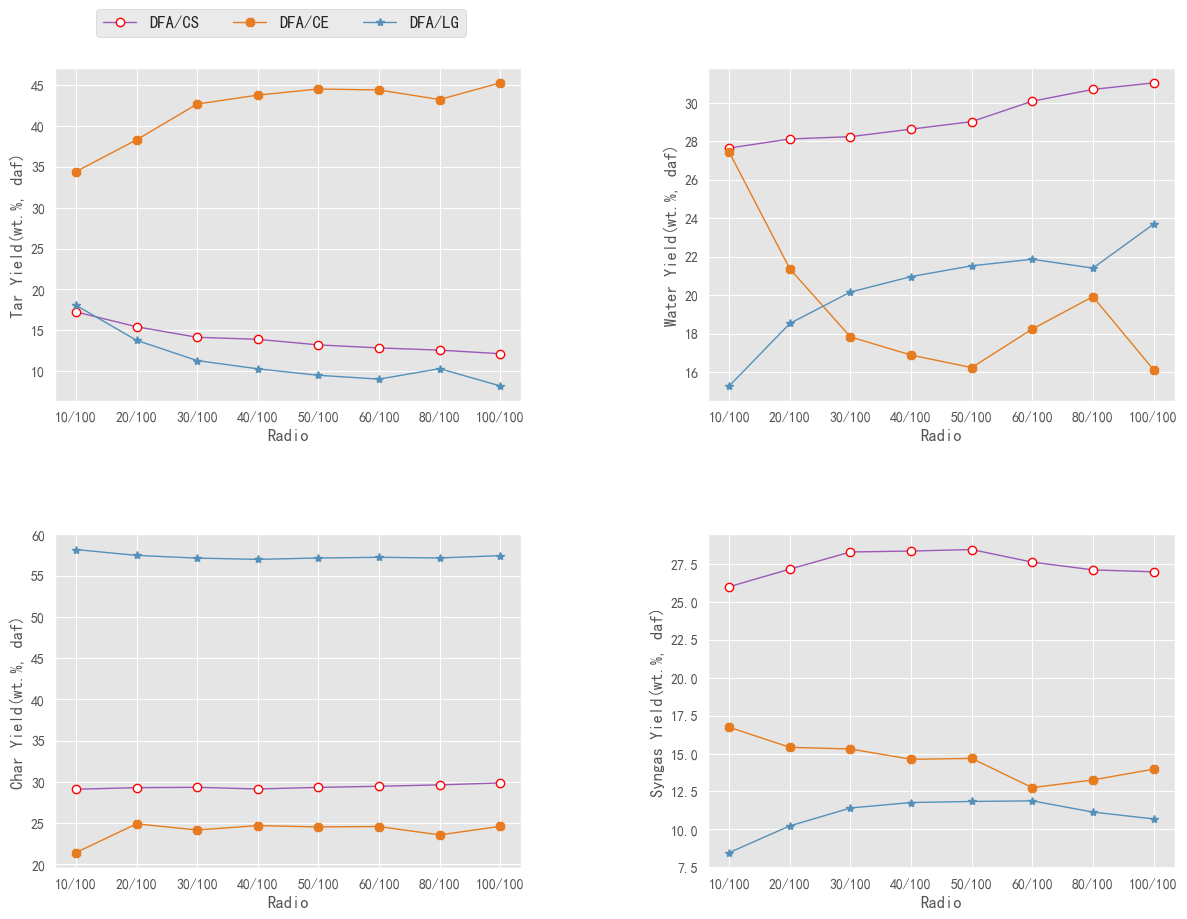

In [99]:
plt.style.use('seaborn-muted')
f, axs = plt.subplots(2, 2,figsize=(14, 10))
axs[0,0].plot(DFA_CS_data.columns.values[2:], DFA_CS_data.loc[0].values[2:], '-', label="Tar", linewidth=1, marker='o', mec='r', mfc='w',color='#9B59B6')
axs[0,0].plot(DFA_CS_data.columns.values[2:], CE.loc[0].values[1:], '-', label="Water", color='#E67C1F',linewidth=1, marker='8')
axs[0,0].plot(DFA_CS_data.columns.values[2:], LG.loc[0].values[1:], '-', label="Char", color='#5490B9',linewidth=1, marker='*',)
axs[0,0].set_xlabel("Radio")
axs[0,0].set_ylabel("Tar Yield(wt.%, daf)")

# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')
axs[0,1].plot(DFA_CS_data.columns.values[2:], DFA_CS_data.loc[1].values[2:], '-', label="DFA/CS", linewidth=1, marker='o', mec='r', mfc='w',color='#9B59B6')
axs[0,1].plot(DFA_CS_data.columns.values[2:], CE.loc[1].values[1:], '-', label="DFA/CE", color='#E67C1F',linewidth=1, marker='8')
axs[0,1].plot(DFA_CS_data.columns.values[2:], LG.loc[1].values[1:], '-', label="DFA/LG", color='#5490B9',linewidth=1, marker='*',)
axs[0,1].set_xlabel("Radio")
axs[0,1].set_ylabel("Water Yield(wt.%, daf)")


axs[1,0].plot(DFA_CS_data.columns.values[2:], DFA_CS_data.loc[2].values[2:], '-', label="DFA/CS", linewidth=1, marker='o', mec='r', mfc='w',color='#9B59B6')
axs[1,0].plot(DFA_CS_data.columns.values[2:], CE.loc[2].values[1:], '-', label="DFA/CE", color='#E67C1F',linewidth=1, marker='8')
axs[1,0].plot(DFA_CS_data.columns.values[2:], LG.loc[2].values[1:], '-', label="DFA/LG", color='#5490B9',linewidth=1, marker='*',)
axs[1,0].set_xlabel("Radio")
axs[1,0].set_ylabel("Char Yield(wt.%, daf)")

axs[1,1].plot(DFA_CS_data.columns.values[2:], DFA_CS_data.loc[3].values[2:], '-', label="DFA/CS", linewidth=1, marker='o', mec='r', mfc='w',color='#9B59B6')
axs[1,1].plot(DFA_CS_data.columns.values[2:], CE.loc[3].values[1:], '-', label="DFA/CE", color='#E67C1F',linewidth=1, marker='8')
axs[1,1].plot(DFA_CS_data.columns.values[2:], LG.loc[3].values[1:], '-', label="DFA/LG", color='#5490B9',linewidth=1, marker='*',)
axs[1,1].set_xlabel("Radio")
axs[1,1].set_ylabel("Syngas Yield(wt.%, daf)")

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.legend(loc='best', bbox_to_anchor=(0, 2.6, -0.5, 0),ncol=4,fontsize='large')
plt.savefig("../Figure/问题3/Production distribution/res.png")
plt.show()

In [16]:
DFA_CS_gas

,H2,CO,CO2,CH4,C2H6,C3H8,C3H6,C2H4,C4H10
DFA/CS,,,,,,,,,
0/100,6.48,25.93,60.40,23.41,2.09,0.55,0.35,0.71,0.32
20/100,12.94,21.61,57.84,28.79,2.73,0.61,0.37,0.74,0.48
40/100,22.65,20.53,52.31,33.11,3.08,0.62,0.41,0.81,0.56
50/100,30.35,20.95,51.92,32.45,2.99,0.71,0.39,0.79,0.37
80/100,37.93,22.00,51.53,30.83,2.96,0.88,0.37,0.77,0.28
100/100,43.62,23.32,50.91,30.21,2.94,0.87,0.38,0.75,0.25


In [15]:
DFA_CE_gas

,H2,CO,CO2,CH4,C2H6
DFA/CE,,,,,
20/100,26.6,13.7,18.7,3.2,13.8
40/100,47.8,10.6,9.8,1.9,8.6
50/100,55.6,8.1,5.9,1.3,4.4
80/100,65.8,6.5,3.2,1.3,3.4
100/100,57.9,5.3,2.0,0.7,3.2


In [14]:
DFA_LG_gas

,H2,CO,CO2,CH4,C2H6
DFA/LG,,,,,
20/100,0.67,15.230,24.35,27.67,0.08
40/100,0.72,15.760,37.91,33.25,0.06
50/100,0.78,17.305,39.26,33.86,0.09
80/100,0.81,19.075,41.23,30.26,0.07
100/100,0.79,20.935,43.56,29.87,0.05


#### DFA催化不同物质的热解气体分布

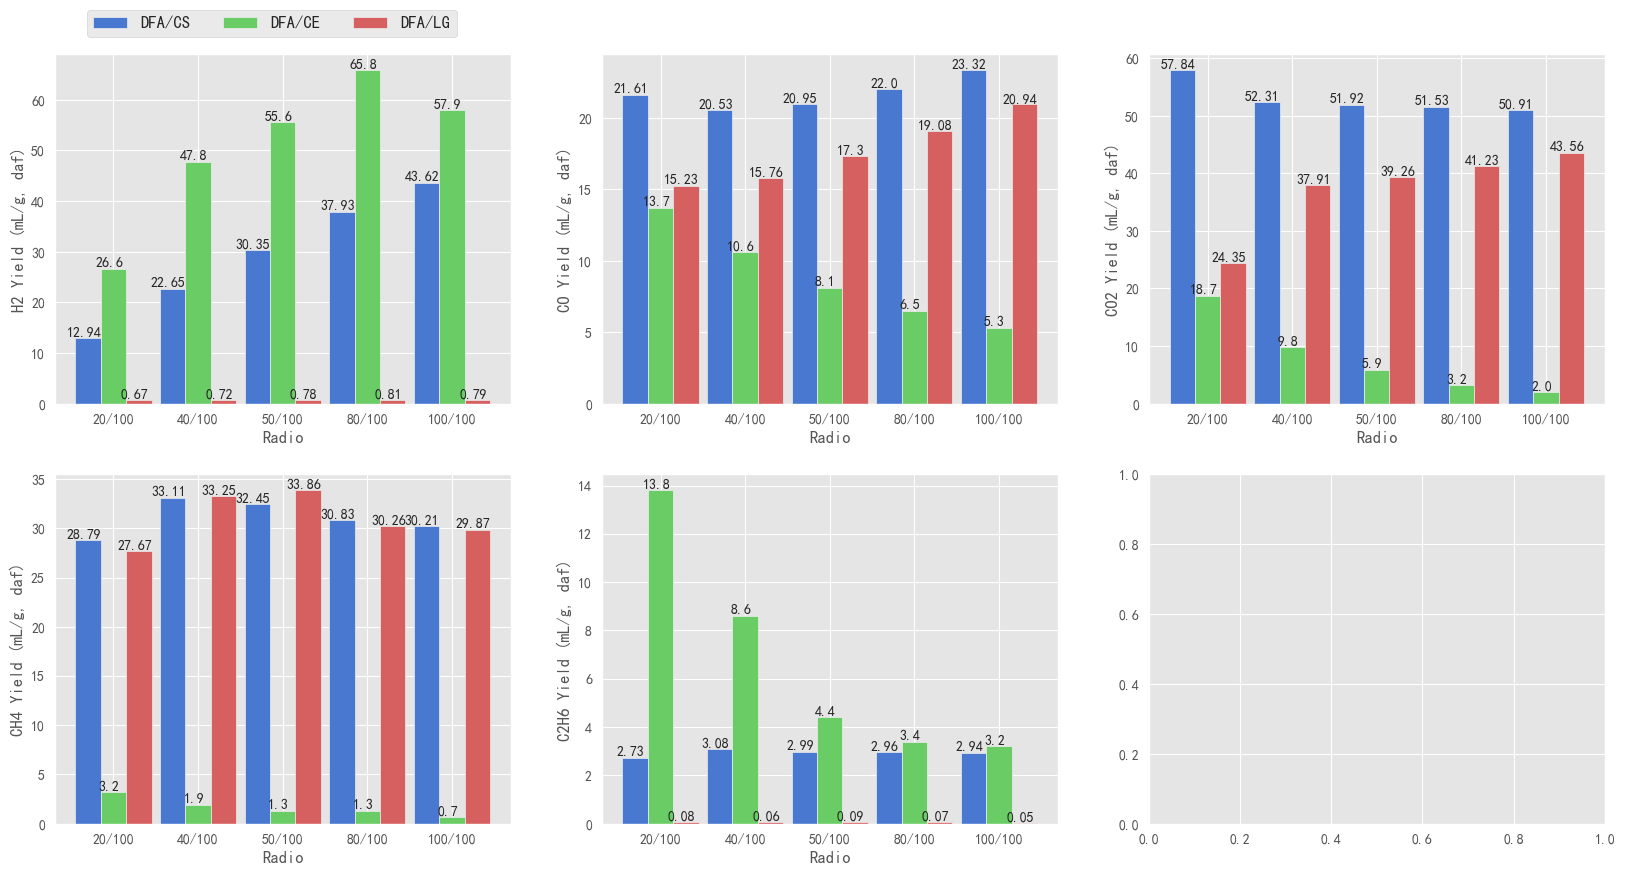

In [178]:
def bar(data1, data2, data3):
    x1 = DFA_LG_gas.index.values
    x = np.arange(5)
    width = 0.3

    f, axs = plt.subplots(2, 3,figsize=(20, 10))
    bars1 = axs[0,0].bar(x - width, data1, width, label='data1')
    bars2 = axs[0,0].bar(x, data2, width, label='data2')
    bars3 = axs[0,0].bar(x + width, data3, width, label='data3')

    def add_labels(bars):
        for bar in bars:
            yval = bar.get_height()
            axs[0,0].text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)
    axs[0,0].set_xticks(x, x1)
    axs[0,0].set_xlabel("")
    axs[0,0].set_ylabel("")

bars1 = axs[0,1].bar(x - width, DFA_CS_gas['CO'], width, label='1')
bars2 = axs[0,1].bar(x, DFA_CE_gas['CO'], width, label='2')
bars3 = axs[0,1].bar(x + width, DFA_LG_gas['CO'], width, label='3')

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        axs[0,1].text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

axs[0,1].set_xticks(x, x1)
axs[0,1].set_xlabel("Radio")
axs[0,1].set_ylabel("CO Yield (mL/g, daf)")


bars1 = axs[0,2].bar(x - width, DFA_CS_gas['CO2'], width, label='1')
bars2 = axs[0,2].bar(x, DFA_CE_gas['CO2'], width, label='2')
bars3 = axs[0,2].bar(x + width, DFA_LG_gas['CO2'], width, label='3')

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        axs[0,2].text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

axs[0,2].set_xticks(x, x1)
axs[0,2].set_xlabel("Radio")
axs[0,2].set_ylabel("CO2 Yield (mL/g, daf)")


bars1 = axs[1,0].bar(x - width, DFA_CS_gas['CH4'], width, label='1')
bars2 = axs[1,0].bar(x, DFA_CE_gas['CH4'], width, label='2')
bars3 = axs[1,0].bar(x + width, DFA_LG_gas['CH4'], width, label='3')

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        axs[1,0].text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

axs[1,0].set_xticks(x, x1)
axs[1,0].set_xlabel("Radio")
axs[1,0].set_ylabel("CH4 Yield (mL/g, daf)")


bars1 = axs[1,1].bar(x - width, DFA_CS_gas['C2H6'], width, label='DFA/CS')
bars2 = axs[1,1].bar(x, DFA_CE_gas['C2H6'], width, label='DFA/CE')
bars3 = axs[1,1].bar(x + width, DFA_LG_gas['C2H6'], width, label='DFA/LG')

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        axs[1,1].text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
axs[1,1].set_xlabel("Radio")
axs[1,1].set_ylabel("C2H6 Yield (mL/g, daf)")

axs[1,1].set_xticks(x, x1)
axs[1,2] = 0
axs[1,1].legend(loc='best', bbox_to_anchor=(0, 2.35, -0.3, 0),ncol=4,fontsize='large')
#plt.savefig("../Figure/问题3/Production distribution/gas")
plt.show()


In [48]:
DFA_CE_data

,DFA/CE,10/100,20/100,30/100,40/100,50/100,60/100,80/100,100/100
0,Tar yield,34.42,38.31,42.69,43.78,44.53,44.41,43.24,45.28
1,Water yield,27.42,21.37,17.84,16.90,16.25,18.25,19.93,16.14
2,Char yield,21.43,24.91,24.17,24.70,24.54,24.59,23.57,24.61
3,Syngas yield,16.73,15.41,15.30,14.62,14.68,12.75,13.26,13.97


In [21]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.8,1]
DFA_CE_data.loc[0].values[1:]

array([34.42, 38.31, 42.69, 43.78, 44.53, 44.41, 43.24, 45.28],
      dtype=object)

In [22]:
CE_df = pd.DataFrame(data={'DFA/CE':x, 'Tar yield':DFA_CE_data.loc[0].values[1:],'Water yield':DFA_CE_data.loc[1].values[1:],
                     'Char yield':DFA_CE_data.loc[2].values[1:],'Syngas yield':DFA_CE_data.loc[3].values[1:]
                     })

In [23]:
LG_df = pd.DataFrame(data={'DFA/LG':x, 'Tar yield':DFA_LG_data.loc[0].values[1:],'Water yield':DFA_LG_data.loc[1].values[1:],
                     'Char yield':DFA_LG_data.loc[2].values[1:],'Syngas yield':DFA_LG_data.loc[3].values[1:]
                     })

In [24]:
LG_df

,DFA/LG,Tar yield,Water yield,Char yield,Syngas yield
0,0.1,18.06,15.3,58.17,8.47
1,0.2,13.77,18.54,57.46,10.23
2,0.3,11.29,20.17,57.13,11.41
3,0.4,10.28,20.97,56.98,11.77
4,0.5,9.49,21.53,57.14,11.84
5,0.6,9.02,21.87,57.23,11.88
6,0.8,10.3,21.41,57.15,11.14
7,1.0,8.19,23.69,57.43,10.69


In [25]:
CE_df

,DFA/CE,Tar yield,Water yield,Char yield,Syngas yield
0,0.1,34.42,27.42,21.43,16.73
1,0.2,38.31,21.37,24.91,15.41
2,0.3,42.69,17.84,24.17,15.3
3,0.4,43.78,16.9,24.7,14.62
4,0.5,44.53,16.25,24.54,14.68
5,0.6,44.41,18.25,24.59,12.75
6,0.8,43.24,19.93,23.57,13.26
7,1.0,45.28,16.14,24.61,13.97


In [26]:
CE_df.corr()

,DFA/CE,Tar yield,Water yield,Char yield,Syngas yield
DFA/CE,1.000000,0.758549,-0.603872,0.367025,-0.790240
Tar yield,0.758549,1.000000,-0.951992,0.721734,-0.794273
Water yield,-0.603872,-0.951992,1.000000,-0.844653,0.620462
Char yield,0.367025,0.721734,-0.844653,1.000000,-0.537429
Syngas yield,-0.790240,-0.794273,0.620462,-0.537429,1.000000


In [46]:
CE_gas.drop(columns="Unnamed: 0",inplace=True)
LG_gas.drop(columns='Unnamed: 0', inplace=True)

In [51]:
CE_gas.iloc[0]

0.2    26.6
0.4    47.8
0.5    55.6
0.8    65.8
1      57.9
Name: 0, dtype: float64

In [52]:
CE_gas_df = pd.DataFrame(data={'H2':CE_gas.iloc[0], 'CO':CE_gas.iloc[1], 'CO2':CE_gas.iloc[2],
    'CH4':CE_gas.iloc[3],'C2H6':CE_gas.iloc[4],    
    })

In [54]:
LG_gas_df = pd.DataFrame(data={'H2':LG_gas.iloc[0], 'CO':LG_gas.iloc[1], 'CO2':LG_gas.iloc[2],
    'CH4':LG_gas.iloc[3],'C2H6':LG_gas.iloc[4],    
    })

,H2,CO,CO2,CH4,C2H6,DFA/CE
0.2,26.6,13.7,18.7,3.2,13.8,0.2
0.4,47.8,10.6,9.8,1.9,8.6,0.4
0.5,55.6,8.1,5.9,1.3,4.4,0.5
0.8,65.8,6.5,3.2,1.3,3.4,0.8
1,57.9,5.3,2.0,0.7,3.2,1


In [21]:
DFA_CS_gas

NameError: name 'DFA_CS_gas' is not defined

In [100]:
import pandas as pd
import statsmodels.api as sm

# 创建DataFrame
data = pd.DataFrame({
    'DFA_CE': [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80, 1.00],
    'Tar_yield': [34.42, 38.31, 42.69, 43.78, 44.53, 44.41, 43.24, 45.28],
    'Water_yield': [27.42, 21.37, 17.84, 16.90, 16.25, 18.25, 19.93, 16.14],
    'Char_yield': [21.43, 24.91, 24.17, 24.70, 24.54, 24.59, 23.57, 24.61],
    'Syngas_yield': [16.73, 15.41, 15.30, 14.62, 14.68, 12.75, 13.26, 13.97]
})

for key in ['Tar_yield', 'Water_yield', 'Char_yield', 'Syngas_yield']:
# 添加截距列
    data_with_intercept = sm.add_constant(data[['DFA_CE']])

    # 多元回归模型
    model = sm.OLS(data[key], data_with_intercept).fit()

    # 打印回归结果
    print(key)
    print(model.summary())

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 计算VIF
# vif_data = sm.add_constant(data[['Water_yield', 'Char_yield', 'Syngas_yield', 'DFA_CE','Tar_yield']])
# vif = pd.DataFrame()
# vif["Variable"] = vif_data.columns
# vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# # 打印VIF
# print(vif)

Tar_yield
                            OLS Regression Results                            
Dep. Variable:              Tar_yield   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     8.131
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0291
Time:                        19:44:02   Log-Likelihood:                -17.995
No. Observations:                   8   AIC:                             39.99
Df Residuals:                       6   BIC:                             40.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5105      1.857     20.20

C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

In [101]:
CE_gas_df.corr()

,H2,CO,CO2,CH4,C2H6,DFA/CE
H2,1.000000,-0.928400,-0.967250,-0.914763,-0.968911,0.819024
CO,-0.928400,1.000000,0.984949,0.971323,0.976579,-0.955375
CO2,-0.967250,0.984949,1.000000,0.984227,0.990524,-0.907061
CH4,-0.914763,0.971323,0.984227,1.000000,0.972205,-0.891793
C2H6,-0.968911,0.976579,0.990524,0.972205,1.000000,-0.871050
DFA/CE,0.819024,-0.955375,-0.907061,-0.891793,-0.871050,1.000000


In [99]:
import pandas as pd
import statsmodels.api as sm

# 创建DataFrame
data = pd.DataFrame({
    'H2': [26.6, 47.8, 55.6, 65.8, 57.9],
    'CO': [13.7, 10.6, 8.1, 6.5, 5.3],
    'CO2': [18.7, 9.8, 5.9, 3.2, 2.0],
    'CH4': [3.2, 1.9, 1.3, 1.3, 0.7],
    'C2H6': [13.8, 8.6, 4.4, 3.4, 3.2],
    'DFA_CE': [0.2, 0.4, 0.5, 0.8, 1.0]
})
for key in ['H2','CO','CO2','CH4','C2H6']:

    # 添加截距列
    data_with_intercept = sm.add_constant(data[['DFA_CE']])

    # 多元线性回归模型
    model = sm.OLS(data[key], data_with_intercept).fit()

    # 打印回归结果
    print(key)
    print(model.summary())

H2
                            OLS Regression Results                            
Dep. Variable:                     H2   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     6.113
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0899
Time:                        19:42:12   Log-Likelihood:                -17.280
No. Observations:                   5   AIC:                             38.56
Df Residuals:                       3   BIC:                             37.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5152     10.020      2.846      

C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observat

In [106]:
LG_gas_df

,H2,CO,CO2,CH4,C2H6
0.2,0.67,15.230,24.35,27.67,0.08
0.4,0.72,15.760,37.91,33.25,0.06
0.5,0.78,17.305,39.26,33.86,0.09
0.8,0.81,19.075,41.23,30.26,0.07
1,0.79,20.935,43.56,29.87,0.05


In [108]:

import pandas as pd
import statsmodels.api as sm

# 创建DataFrame

for key in ['H2','CO','CO2','CH4','C2H6']:

    # 添加截距列
    data_with_intercept = sm.add_constant(list(LG_gas_df.index.values))

    # 多元线性回归模型
    model = sm.OLS(LG_gas_df[key], data_with_intercept).fit()

    # 打印回归结果
    print(key)
    print(model.summary())

H2
                            OLS Regression Results                            
Dep. Variable:                     H2   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     8.522
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0615
Time:                        20:13:08   Log-Likelihood:                 11.089
No. Observations:                   5   AIC:                            -18.18
Df Residuals:                       3   BIC:                            -18.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6639      0.034     19.290      

C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observat

In [111]:
LG_df

,DFA/LG,Tar yield,Water yield,Char yield,Syngas yield
0,0.1,18.06,15.3,58.17,8.47
1,0.2,13.77,18.54,57.46,10.23
2,0.3,11.29,20.17,57.13,11.41
3,0.4,10.28,20.97,56.98,11.77
4,0.5,9.49,21.53,57.14,11.84
5,0.6,9.02,21.87,57.23,11.88
6,0.8,10.3,21.41,57.15,11.14
7,1.0,8.19,23.69,57.43,10.69


In [112]:
import pandas as pd
import statsmodels.api as sm

for key in ['Tar_yield', 'Water_yield', 'Char_yield', 'Syngas_yield']:
# 添加截距列
    data_with_intercept = sm.add_constant(LG_df['DFA/LG'])

    # 多元回归模型
    model = sm.OLS(data[key], data_with_intercept).fit()

    # 打印回归结果
    print(key)
    print(model.summary())

Tar_yield
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     8.131
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0291
Time:                        20:15:50   Log-Likelihood:                -17.995
No. Observations:                   8   AIC:                             39.99
Df Residuals:                       6   BIC:                             40.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5105      1.857     20.20

C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\李智杰\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

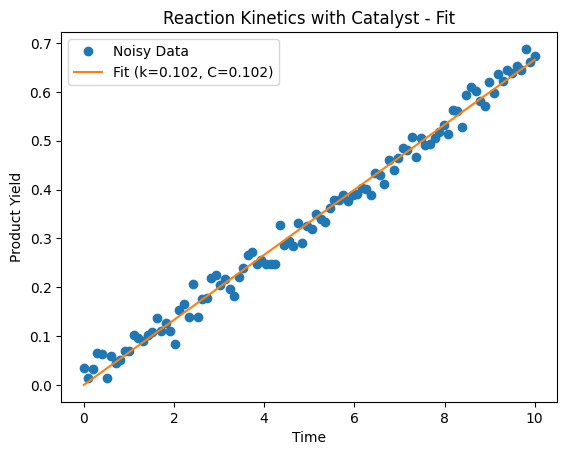

True parameters: k=0.1, C=0.2
Fitted parameters: k=0.10196400526254569, C=0.10195497858226686


In [115]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义反应动力学方程
def reaction_kinetics(Y, t, k, C, r, total):
    biomass = (1 - r) * total
    dydt = k * (1 + C * r) * (1 - r) * biomass
    return dydt

# 设置模型参数
r = 0.2  # 混合比
total_volume = 1.0  # 总体积
initial_condition = 0.0  # 初始条件

# 设置时间步长
time = np.linspace(0, 10, 100)

# 生成模拟数据
k_true = 0.1
C_true = 0.2
solution_true = odeint(reaction_kinetics, initial_condition, time, args=(k_true, C_true, r, total_volume))

# 添加噪声模拟实验数据
np.random.seed(0)
solution_noisy = solution_true + 0.02 * np.random.normal(size=solution_true.shape)

# 定义拟合的模型函数
def fit_function(t, k, C):
    return odeint(reaction_kinetics, initial_condition, t, args=(k, C, r, total_volume)).flatten()

# 使用 curve_fit 进行拟合
params, covariance = curve_fit(fit_function, time, solution_noisy.flatten(), bounds=(0, [1.0, 1.0]))

# 获取拟合后的参数
k_fit, C_fit = params

# 可视化实验数据和拟合曲线
plt.plot(time, solution_noisy, 'o', label='Noisy Data')
plt.plot(time, fit_function(time, k_fit, C_fit), '-', label='Fit (k={}, C={})'.format(round(k_fit, 3), round(C_fit, 3)))
plt.xlabel('Time')
plt.ylabel('Product Yield')
plt.title('Reaction Kinetics with Catalyst - Fit')
plt.legend()
plt.show()

# 打印拟合参数
print(f"True parameters: k={k_true}, C={C_true}")
print(f"Fitted parameters: k={k_fit}, C={C_fit}")


In [334]:
CE_gas_df

,H2,CO,CO2,CH4,C2H6,DFA/CE
0,26.6,13.7,18.7,3.2,13.8,0.2
1,47.8,10.6,9.8,1.9,8.6,0.4
2,55.6,8.1,5.9,1.3,4.4,0.5
3,65.8,6.5,3.2,1.3,3.4,0.8
4,57.9,5.3,2.0,0.7,3.2,1


a: 17.729464235406176 ± 2.69056184048738
b: -6.677806832470828 ± 1.3137542436006833
c: 8.995995531482627 ± 0.43027990189346554
t-statistic for a: 6.589502597046639
t-statistic for b: -5.082995442259103
t-statistic for c: 20.907310548076623
Critical t-value: 2.5705818366147395
Parameter 'a' is statistically significant.
Parameter 'b' is statistically significant.
Parameter 'c' is statistically significant.


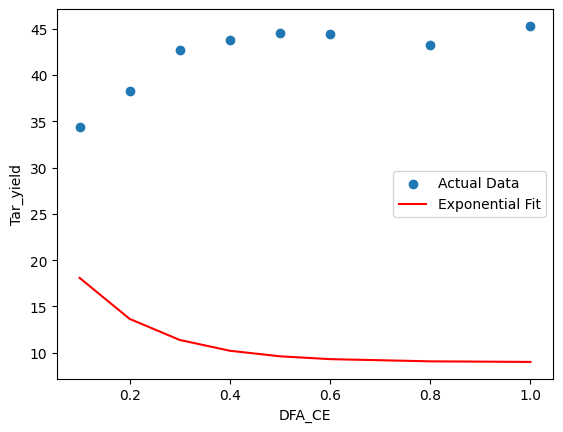

a: 21855.224316493004 ± 62648821.02859473
b: 0.0003303992751664881 ± 0.9468416653791155
c: -21838.309910040258 ± 62648822.99142828
t-statistic for a: 0.0003488529226514518
t-statistic for b: 0.0003489488129297692
t-statistic for c: -0.000348582924104228
Critical t-value: 2.5705818366147395
Parameter 'a' is not statistically significant.
Parameter 'b' is not statistically significant.
Parameter 'c' is not statistically significant.


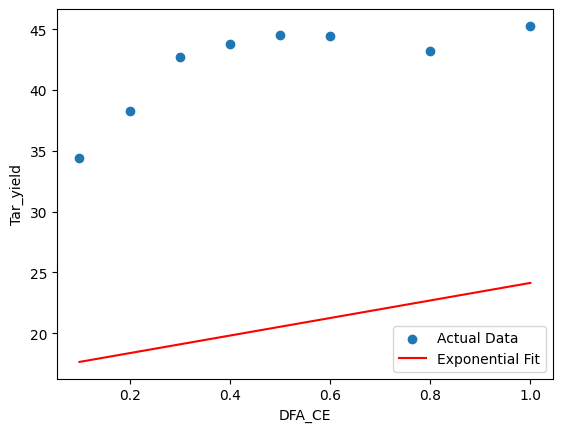

a: -1163.9226742039903 ± 31018818.068982005
b: 0.00041481223214730184 ± 11.05203948138196
c: 1221.4943512379791 ± 31018818.5677757
t-statistic for a: -3.752311489159808e-05
t-statistic for b: 3.753264117867892e-05
t-statistic for c: 3.937913845973954e-05
Critical t-value: 2.5705818366147395
Parameter 'a' is not statistically significant.
Parameter 'b' is not statistically significant.
Parameter 'c' is not statistically significant.


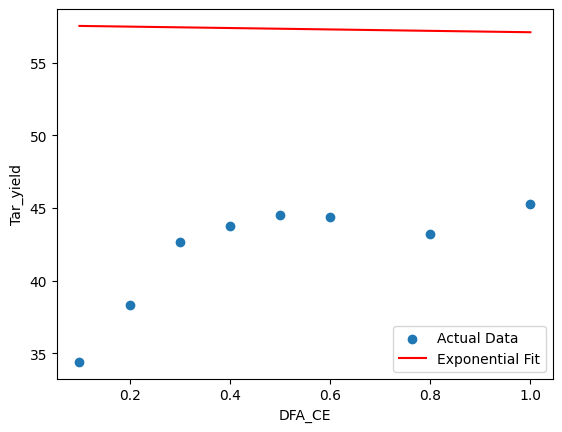

a: 6098.942334247748 ± 141431897.91289327
b: 0.00026577230230740345 ± 6.162119377628242
c: -6088.8038565813595 ± 141431900.16700202
t-statistic for a: 4.312282041215367e-05
t-statistic for b: 4.3130015181513316e-05
t-statistic for c: -4.3051135206355374e-05
Critical t-value: 2.5705818366147395
Parameter 'a' is not statistically significant.
Parameter 'b' is not statistically significant.
Parameter 'c' is not statistically significant.


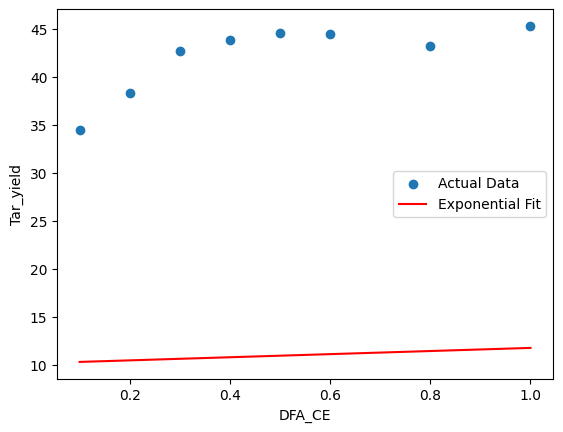

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
# 示例数据

x = np.array([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80, 1.00])

# 定义指数函数模型
def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c


for key in ['Tar yield', 'Water yield', 'Char yield', 'Syngas yield']:
    # 初始参数猜测
    initial_guess = (1, 1, 1)

    # 使用curve_fit进行拟合
    params, covariance = curve_fit(exponential_model, x, LG_df[key], p0=initial_guess,maxfev = 10000)

    # 获取拟合后的参数
    a, b, c = params

    # 获取拟合参数的标准差
    params_std = np.sqrt(np.diag(covariance))

    # 打印拟合参数和其标准差
    print(f"a: {a} ± {params_std[0]}")
    print(f"b: {b} ± {params_std[1]}")
    print(f"c: {c} ± {params_std[2]}")

    # 计算 t 统计量
    t_statistic_a = a / params_std[0]
    t_statistic_b = b / params_std[1]
    t_statistic_c = c / params_std[2]

    # 计算自由度
    df = len(x) - len(params)

    # 计算 t 分布的临界值（双尾检验，显著性水平为0.05）
    t_critical = t.ppf(0.975, df)

    # 打印 t 统计量和临界值
    print(f"t-statistic for a: {t_statistic_a}")
    print(f"t-statistic for b: {t_statistic_b}")
    print(f"t-statistic for c: {t_statistic_c}")
    print(f"Critical t-value: {t_critical}")

    # 判断参数是否显著
    if np.abs(t_statistic_a) > t_critical:
        print("Parameter 'a' is statistically significant.")
    else:
        print("Parameter 'a' is not statistically significant.")

    if np.abs(t_statistic_b) > t_critical:
        print("Parameter 'b' is statistically significant.")
    else:
        print("Parameter 'b' is not statistically significant.")

    if np.abs(t_statistic_c) > t_critical:
        print("Parameter 'c' is statistically significant.")
    else:
        print("Parameter 'c' is not statistically significant.")

    # 绘制实际数据和拟合曲线
    plt.scatter(x, y, label='Actual Data')
    plt.plot(x, exponential_model(x, a, b, c), color='red', label='Exponential Fit')
    plt.xlabel('DFA_CE')
    plt.ylabel('Tar_yield')
    plt.legend()
    plt.show()

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 示例数据（替换成你的实际数据）
# 将数据转换为二维数组
name = ['H2', 'CO', 'CO2', 'CH4', 'C2H6']

for i,key in enumerate(name):
    x = LG_gas_df['DFA_LG'].values
    y = LG_gas_df[key].values
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # 创建多项式特征
    degree = 2  # 多项式的次数
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)

    # 使用线性回归拟合多项式特征
    model = LinearRegression()
    model.fit(x_poly, y)

    # 预测
    # x_new = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    # x_new_poly = poly_features.transform(x_new)
    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(key)
    # 打印评估指标
    print(f"均方误差 (MSE): {mse}")
    print(f"决定系数 (R-squared): {r2}")
    coefficients = model.coef_[0]
    print(f"多项式回归的系数: {coefficients}")
    intercept = model.intercept_
    print(f"多项式回归的常数项 (intercept): {intercept}")
    
    # fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # # 可视化结果
    # axs[0].scatter(x, y, label='Real Data')
    # axs[0].plot(x, y_pred, color='red', label=f'Polynomial regression ({degree} degree）')
    # axs[0].set_title('DFA/CE_{} Curve fitting'.format(key))
    # axs[0].legend()
    # # plt.savefig("../Figure/问题1/拟合曲线/")
    # residuals = y - y_pred
    # axs[1].scatter(x, residuals)
    # axs[1].axhline(y=0, color='black', linestyle='--', linewidth=2)
    # axs[1].set_title('DFA/CE_{} Residual plot'.format(key))
    # plt.savefig("../Figure/问题4/CE/{}.png".format(key))
    # plt.show()

H2
均方误差 (MSE): 0.00012833333333333338
决定系数 (R-squared): 0.9518268268268268
多项式回归的系数: [ 0.          0.6047619  -0.36904762]
多项式回归的常数项 (intercept): [0.5575]
CO
均方误差 (MSE): 0.08504175170068036
决定系数 (R-squared): 0.9809909638078713
多项式回归的系数: [0.         3.8295068  2.85459184]
多项式回归的常数项 (intercept): [14.24666667]
CO2
均方误差 (MSE): 3.1752615986394526
决定系数 (R-squared): 0.9299187592788868
多项式回归的系数: [  0.          78.49268707 -48.06122449]
多项式回归的常数项 (intercept): [11.82583333]
CH4
均方误差 (MSE): 1.5605887414965938
决定系数 (R-squared): 0.7016525384576601
多项式回归的系数: [  0.          36.19421769 -29.73639456]
多项式回归的常数项 (intercept): [22.41916667]
C2H6
均方误差 (MSE): 0.00010510204081632657
决定系数 (R-squared): 0.47448979591836704
多项式回归的系数: [ 0.          0.06377551 -0.07653061]
多项式回归的常数项 (intercept): [0.065]


## 问题五

In [154]:
CE_df.values.tolist()

[[0.1, 34.42, 27.42, 21.429999999999996, 16.73],
 [0.2, 38.31, 21.37, 24.909999999999993, 15.41],
 [0.3, 42.69, 17.84, 24.169999999999998, 15.3],
 [0.4, 43.78, 16.9, 24.700000000000003, 14.62],
 [0.5, 44.53, 16.25, 24.54, 14.68],
 [0.6, 44.41, 18.25, 24.590000000000003, 12.75],
 [0.8, 43.24, 19.93, 23.57, 13.26],
 [1.0, 45.28, 16.14, 24.61, 13.97]]

In [158]:
X[:]

[[0.1, 34.42, 27.42, 21.429999999999996, 16.73],
 [0.2, 38.31, 21.37, 24.909999999999993, 15.41],
 [0.3, 42.69, 17.84, 24.169999999999998, 15.3],
 [0.4, 43.78, 16.9, 24.700000000000003, 14.62],
 [0.5, 44.53, 16.25, 24.54, 14.68],
 [0.6, 44.41, 18.25, 24.590000000000003, 12.75],
 [0.8, 43.24, 19.93, 23.57, 13.26],
 [1.0, 45.28, 16.14, 24.61, 13.97]]

### 灰色预测

In [256]:
class GrayForecast():
    def __init__(self, data, datacolumn=None):
    
        if isinstance(data, pd.core.frame.DataFrame):
            self.data=data
            try:
                self.data.columns = ['数据']
            except:
                if not datacolumn:
                    raise Exception('您传入的dataframe不止一列')
                else:
                    self.data = pd.DataFrame(data[datacolumn])
                    self.data.columns=['数据']
        elif isinstance(data, pd.core.series.Series):
            self.data = pd.DataFrame(data, columns=['数据'])
        else:
            self.data = pd.DataFrame(data, columns=['数据'])
    
        self.forecast_list = self.data.copy()
    
        if datacolumn:
            self.datacolumn = datacolumn
        else:
            self.datacolumn = None
        #save arg:
        #        data                DataFrame    数据
        #        forecast_list       DataFrame    预测序列
        #        datacolumn          string       数据的含义
    def level_check(self):
        # 数据级比校验
        n = len(self.data)
        lambda_k = np.zeros(n-1)
        for i in range(n-1):
            lambda_k[i] = self.data.ix[i]["数据"]/self.data.ix[i+1]["数据"]
            if lambda_k[i] < np.exp(-2/(n+1)) or lambda_k[i] > np.exp(2/(n+2)):
                flag = False
        else:
            flag = True
    
        self.lambda_k = lambda_k
    
        if not flag:
            print("级比校验失败，请对X(0)做平移变换")
            return False
        else:
            print("级比校验成功，请继续")
            return True
    
    #save arg:
    #        lambda_k            1-d list
    
    
    def GM_11_build_model(self, forecast=5):
        if forecast > len(self.data):
            raise Exception('您的数据行不够')
        X_0 = np.array(self.forecast_list['数据'].tail(forecast))
    #       1-AGO
        X_1 = np.zeros(X_0.shape)
        for i in range(X_0.shape[0]):
            X_1[i] = np.sum(X_0[0:i+1])
    #       紧邻均值生成序列
        Z_1 = np.zeros(X_1.shape[0]-1)
        for i in range(1, X_1.shape[0]):
            Z_1[i-1] = -0.5*(X_1[i]+X_1[i-1])
    
        B = np.append(np.array(np.mat(Z_1).T), np.ones(Z_1.shape).reshape((Z_1.shape[0], 1)), axis=1)
        Yn = X_0[1:].reshape((X_0[1:].shape[0], 1))
    
        B = np.mat(B)
        Yn = np.mat(Yn)
        a_ = (B.T*B)**-1 * B.T * Yn
    
        a, b = np.array(a_.T)[0]
    
        X_ = np.zeros(X_0.shape[0])
        def f(k):
            return (X_0[0]-b/a)*(1-np.exp(a))*np.exp(-a*(k))
    
        self.forecast_list.loc[len(self.forecast_list)] = f(X_.shape[0])
        
    def forecast(self, time=5, forecast_data_len=5):
        for i in range(time):
            self.GM_11_build_model(forecast=forecast_data_len)
            
    def log(self):
        res = self.forecast_list.copy()
        if self.datacolumn:
            res.columns = [self.datacolumn]
        return res
    def reset(self):
        self.forecast_list = self.data.copy()
        
        
    def plot(self, data):
        plt.scatter([2,4,5,8], data, label='Original Data', color='red')
        plt.plot(range(0,len(self.forecast_list)),self.forecast_list, label='Forecast Data')
        if self.datacolumn:
            plt.ylabel(self.datacolumn)
            plt.legend()


In [235]:
CS_df = pd.DataFrame(data={'Tar yield': DFA_CS_data.loc[0][1:], 'Water yield':DFA_CS_data.loc[1][1:], 'Char yield': DFA_CS_data.loc[2][1:], 'Syngas yield':DFA_CS_data.loc[3][1:], 
                            'DFA/CS':[0,1,2,3,4,5,6,8,10]                           
                           })


ValueError: x and y must be the same size

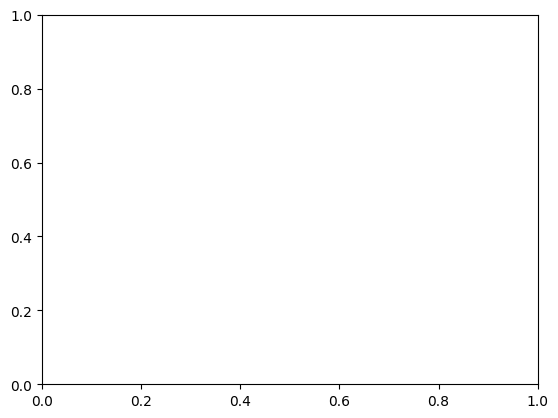

In [272]:
for key in ['Tar yield', 'Water yield', 'Char yield', 'Syngas yield']:    
    plt.figure()
    gf = GrayForecast(CS_df[:7], key)
    gf.forecast(10)
    gf.log()
    gf.plot(CS_df[key])
    res = gf.log()
    def RMSE(y,y_pred):
        rmse = np.sqrt(np.mean((y - y_pred) ** 2))
        return rmse;
    print(key)
    print(res)
    print("RMSE:{}".format(RMSE(CS_df.loc[[7,8]], res.loc[[7,9]])))
    print(r2_score(CS_df.loc[[7,8]], res.loc[[7,9]]))
    #plt.savefig("../Figure/问题5/CS/{}.png".format(key))
    print()
    print()

### 神经网络

In [312]:
LG_gas_df

,H2,CO,CO2,CH4,C2H6,DFA_LG
0.2,0.67,15.230,24.35,27.67,0.08,0.2
0.4,0.72,15.760,37.91,33.25,0.06,0.4
0.5,0.78,17.305,39.26,33.86,0.09,0.5
0.8,0.81,19.075,41.23,30.26,0.07,0.8
1,0.79,20.935,43.56,29.87,0.05,1


In [318]:
DFA_CS_gas

,H2,CO,CO2,CH4,C2H6,C3H8,C3H6,C2H4,C4H10,DFA/CS
DFA/CS,,,,,,,,,,
0/100,6.48,25.93,60.40,23.41,2.09,0.55,0.35,0.71,0.32,0.0
20/100,12.94,21.61,57.84,28.79,2.73,0.61,0.37,0.74,0.48,0.2
40/100,22.65,20.53,52.31,33.11,3.08,0.62,0.41,0.81,0.56,0.4
50/100,30.35,20.95,51.92,32.45,2.99,0.71,0.39,0.79,0.37,0.5
80/100,37.93,22.00,51.53,30.83,2.96,0.88,0.37,0.77,0.28,0.8
100/100,43.62,23.32,50.91,30.21,2.94,0.87,0.38,0.75,0.25,1.0


In [324]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
# 示例数据


df = DFA_CS_gas

for key in ['H2', 'CO', 'CO2', 'CH4', 'C2H6','C3H8','C3H6','C2H4','C4H10']:
    # 分离自变量和因变量
    X = df[['DFA/CS']]
    y = df[key]

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 建立神经网络模型
    from sklearn.model_selection import GridSearchCV

# 定义神经网络模型
    model = MLPRegressor(max_iter=1000, random_state=42)

    # 定义搜索的隐藏层数的候选值
    param_grid = {'hidden_layer_sizes': [(10,), (20,), (30, 50), (10, 50)]}

    # 创建 GridSearchCV 对象
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring='neg_mean_squared_error')

    # 在训练集上进行网格搜索
    grid_search.fit(X_train, y_train)

    # 获取最佳模型
    best_model = grid_search.best_estimator_

    # 在测试集上进行预测
    y_pred = best_model.predict(X_test)

    # 评估模型
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(key)
    print("最佳隐藏层数:", best_model.hidden_layer_sizes)
    print(f"均方误差 (MSE): {mse}")
    print("预测数据")
    for i in [0,0.3,0.6,0.7,0.9]:
        predict = best_model.predict([[i]])
        print("{index}:{data}".format(index=i,data=predict))

H2
最佳隐藏层数: (10, 50)
均方误差 (MSE): 9.650887385055102
预测数据
0:[16.81341773]
0.3:[24.37743551]
0.6:[31.94095526]
0.7:[34.46212852]
0.9:[39.50447502]
CO
最佳隐藏层数: (30, 50)
均方误差 (MSE): 6.3534061401142035
预测数据
0:[17.42289386]
0.3:[19.36611214]
0.6:[21.2962234]
0.7:[21.93841466]
0.9:[23.22247928]
CO2
最佳隐藏层数: (30, 50)
均方误差 (MSE): 11.590271896020054
预测数据
0:[47.0051937]
0.3:[49.08673164]
0.6:[51.05297364]
0.7:[51.69112068]
0.9:[52.96741477]
CH4
最佳隐藏层数: (30, 50)
均方误差 (MSE): 8.173086445287154
预测数据
0:[34.02644881]
0.3:[33.02748359]
0.6:[31.93254832]
0.7:[31.55338525]
0.9:[30.79505911]
C2H6
最佳隐藏层数: (30, 50)
均方误差 (MSE): 0.5146948134508145
预测数据
0:[2.80228242]
0.3:[2.91786612]
0.6:[3.02205409]
0.7:[3.05587604]
0.9:[3.12501164]
C3H8
最佳隐藏层数: (10, 50)
均方误差 (MSE): 0.06508470192832402
预测数据
0:[0.47072179]
0.3:[0.61501691]
0.6:[0.75607302]
0.7:[0.80245519]
0.9:[0.89253962]
C3H6
最佳隐藏层数: (30, 50)
均方误差 (MSE): 0.057146118083201754
预测数据
0:[0.4245395]
0.3:[0.40051535]
0.6:[0.39275437]
0.7:[0.38483905]
0.9:[0.36776557]
C

In [1]:
# Required libraries
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoiding unnecessary log messges and warnings
import logging
logging.getLogger("dowhy").setLevel(logging.WARNING)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [4]:
data['df'].head()

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,1.0,0.021311,0.532685,2.092912,-0.858707,-0.575445,1.230574,True,10.571146
1,0.0,0.213123,0.761937,0.647852,0.004805,-1.694677,0.325229,True,5.863389
2,1.0,0.961835,-1.440735,2.337050,-0.509782,1.250251,0.534150,True,15.471459
3,0.0,0.813257,0.964801,-1.185080,-0.215255,-0.591351,0.847790,True,6.032196
4,0.0,0.656513,1.574951,0.246063,-1.004576,-0.241535,1.968929,True,9.962865


In [8]:
print(data["treatment_name"])
print(data["outcome_name"])
print(data["common_causes_names"])
print(data["instrument_names"])

['v0']
y
['W0', 'W1', 'W2', 'W3', 'W4']
['Z0', 'Z1']


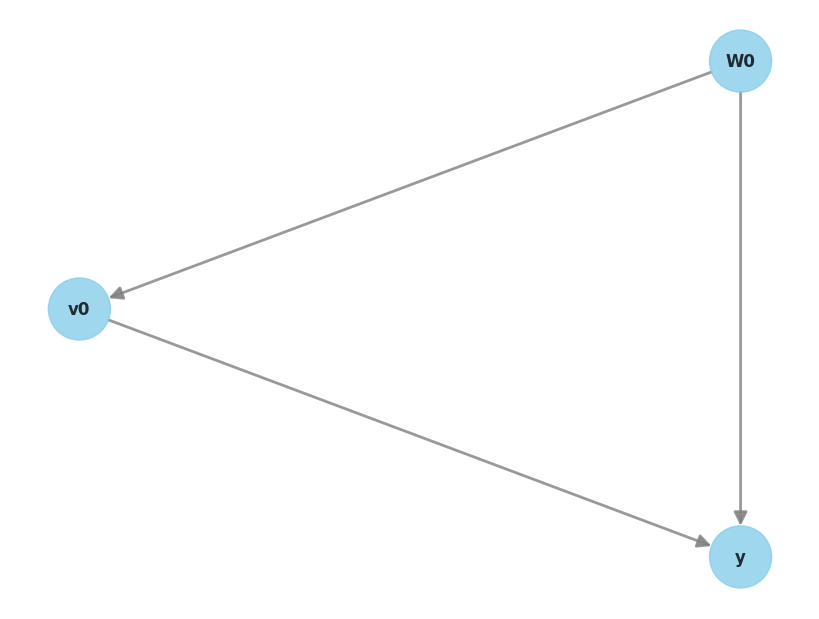

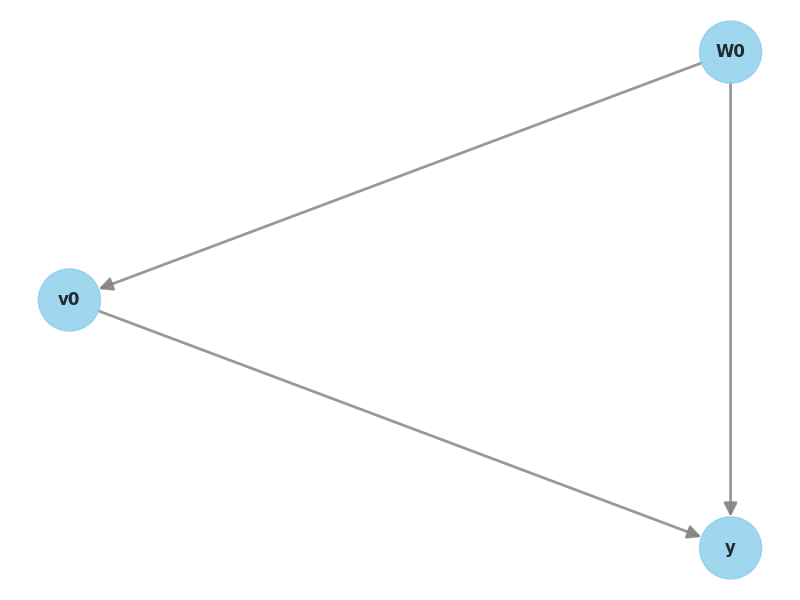

In [10]:
# I. Create a causal model from the data and domain knowledge.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"][0],
    outcome=data["outcome_name"],
    common_causes=data["common_causes_names"][0],
    intrumental_variables=data["instrument_names"])

# visualize the graph
model.view_model(layout="dot")
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [13]:
data = {
    'DFA/LG': [10, 20, 30, 40, 50, 60, 80, 100],
    'Tar_yield': [18.06, 13.77, 11.29, 10.28, 9.49, 9.02, 10.30, 8.19],
    'Water_yield': [15.30, 18.54, 20.17, 20.97, 21.53, 21.87, 21.41, 23.69],
    'Char_yield': [58.17, 57.46, 57.13, 56.98, 57.14, 57.23, 57.15, 57.43],
    'Syngas_yield': [8.47, 10.23, 11.41, 11.77, 11.84, 11.88, 11.14, 10.69]
}

df = pd.DataFrame(data)

In [17]:
df

,DFA/LG,Tar_yield,Water_yield,Char_yield,Syngas_yield,v0
0,10,18.06,15.30,58.17,8.47,True
1,20,13.77,18.54,57.46,10.23,True
2,30,11.29,20.17,57.13,11.41,True
3,40,10.28,20.97,56.98,11.77,True
4,50,9.49,21.53,57.14,11.84,True
5,60,9.02,21.87,57.23,11.88,True
6,80,10.30,21.41,57.15,11.14,True
7,100,8.19,23.69,57.43,10.69,True


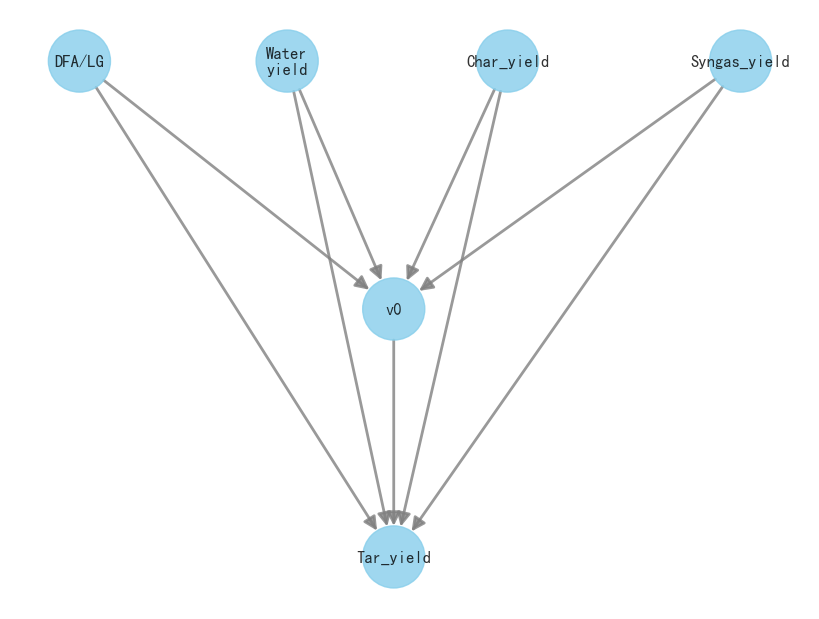

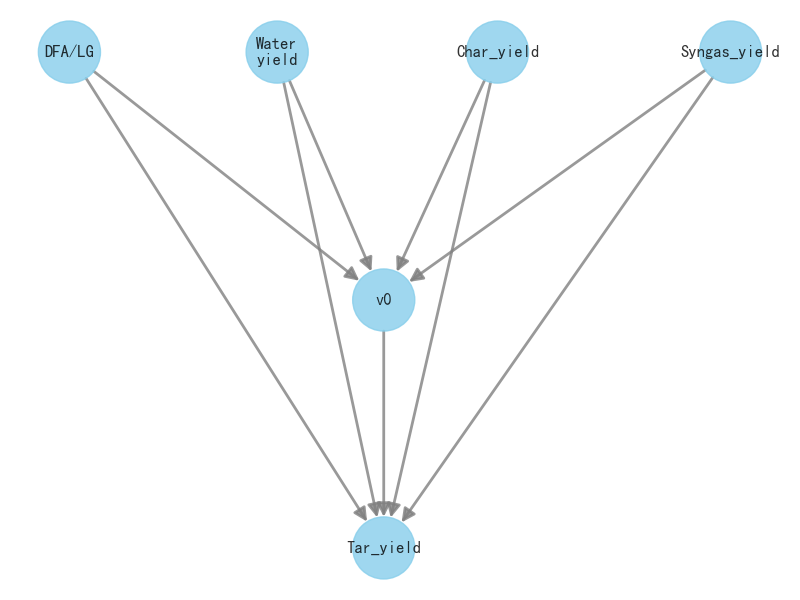

In [20]:
# I. Create a causal model from the data and domain knowledge.
model = CausalModel(
    data=df,
    treatment=['v0'],
    outcome=['Tar_yield'],
    common_causes=['DFA/LG', 'Water yield', 'Char_yield', 'Syngas_yield'],
    #intrumental_variables=data["instrument_names"])
)
# visualize the graph
model.view_model(layout="dot")
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [43]:
import pandas as pd

# Given data
data = {
    'DFA/CE': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1],
    'Tar': [34.42, 38.31, 42.69, 43.78, 44.53, 44.41, 43.24, 45.28],
    'Water': [27.42, 21.37, 17.84, 16.9, 16.25, 18.25, 19.93, 16.14],
    'Char': [21.43, 24.91, 24.17, 24.7, 24.54, 24.59, 23.57, 24.61],
    'Syngas': [16.73, 15.41, 15.3, 14.62, 14.68, 12.75, 13.26, 13.97],
    'D':[1,1,1,1,1,1,1,1],
    'DX':[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   DFA/CE   Tar  Water  Char  Syngas  D   DX
0    0.10 34.42  27.42 21.43   16.73  1 0.10
1    0.20 38.31  21.37 24.91   15.41  1 0.20
2    0.30 42.69  17.84 24.17   15.30  1 0.30
3    0.40 43.78  16.90 24.70   14.62  1 0.40
4    0.50 44.53  16.25 24.54   14.68  1 0.50
5    0.60 44.41  18.25 24.59   12.75  1 0.60
6    0.80 43.24  19.93 23.57   13.26  1 0.80
7    1.00 45.28  16.14 24.61   13.97  1 1.00


                            OLS Regression Results                            
Dep. Variable:                    Tar   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sun, 19 Nov 2023   Prob (F-statistic):             0.0187
Time:                        22:04:33   Log-Likelihood:                -16.163
No. Observations:                   8   AIC:                             36.33
Df Residuals:                       6   BIC:                             36.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DFA/LG        -4.1803      1.308     -3.196      0.0

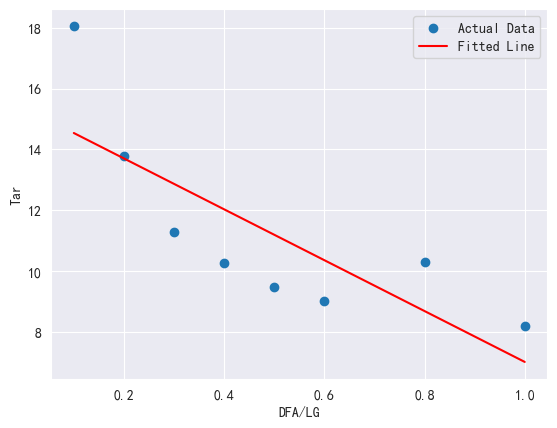

                            OLS Regression Results                            
Dep. Variable:                  Water   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 19 Nov 2023   Prob (F-statistic):            0.00542
Time:                        22:04:33   Log-Likelihood:                -12.726
No. Observations:                   8   AIC:                             29.45
Df Residuals:                       6   BIC:                             29.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DFA/LG         3.6112      0.851      4.243      0.0

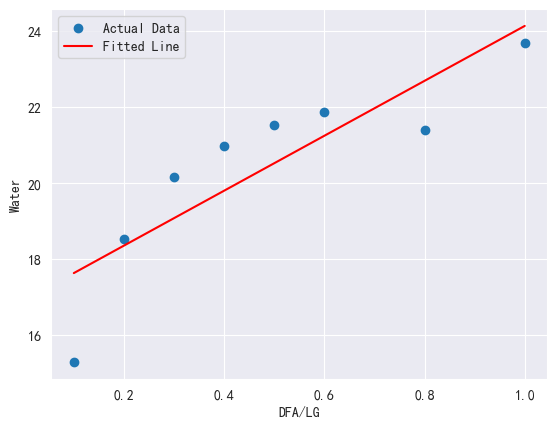

                            OLS Regression Results                            
Dep. Variable:                   Char   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.105
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.334
Time:                        22:04:34   Log-Likelihood:                -2.2488
No. Observations:                   8   AIC:                             8.498
Df Residuals:                       6   BIC:                             8.656
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DFA/LG        -0.2415      0.230     -1.051      0.3

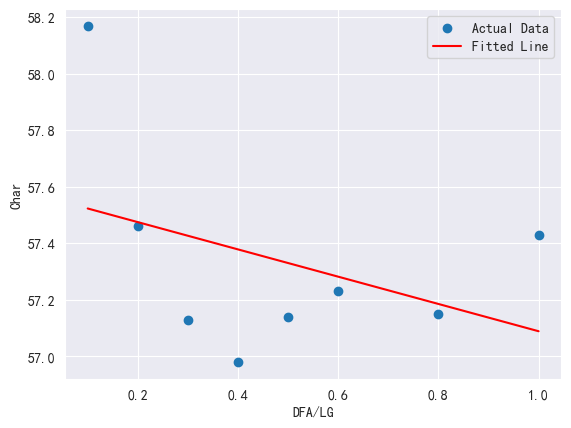

                            OLS Regression Results                            
Dep. Variable:                 Syngas   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.346
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.290
Time:                        22:04:34   Log-Likelihood:                -11.149
No. Observations:                   8   AIC:                             26.30
Df Residuals:                       6   BIC:                             26.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DFA/LG         0.8107      0.699      1.160      0.2

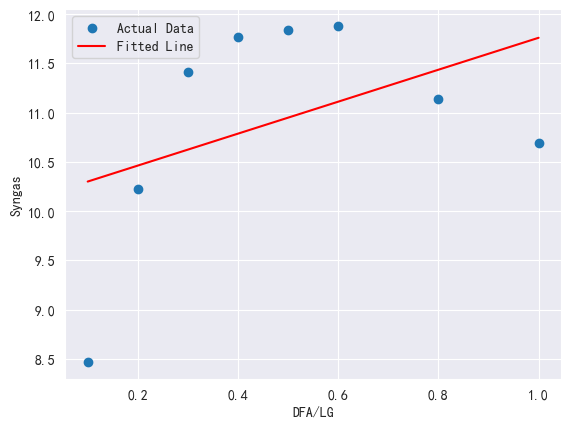

In [54]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Given data

data = {
    'DFA/LG': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1],
    'Tar': [18.06, 13.77, 11.29, 10.28, 9.49, 9.02, 10.3, 8.19],
    'Water': [15.3, 18.54, 20.17, 20.97, 21.53, 21.87, 21.41, 23.69],
    'Char': [58.17, 57.46, 57.13, 56.98, 57.14, 57.23, 57.15, 57.43],
    'Syngas': [8.47, 10.23, 11.41, 11.77, 11.84, 11.88, 11.14, 10.69],
    'D': [1, 1, 1, 1, 1, 1, 1, 1],
    'DX':[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Define independent variables (features)
X = df[['DFA/LG', 'D', 'DX']]

# Add a constant term to the independent variables
X = sm.add_constant(X)
for key in ['Tar','Water', 'Char', 'Syngas']:
    # Define dependent variable
    y = df[key]

    # Fit the multiple linear regression model
    model = sm.OLS(y, X).fit()

    # Display the regression results
    print(model.summary())

    # Plot the data points
    plt.scatter(df['DFA/LG'], df[key], label='Actual Data')

    # Plot the fitted regression line
    plt.plot(df['DFA/LG'], model.predict(X), color='red', label='Fitted Line')

    # Label the axes
    plt.xlabel('DFA/LG')
    plt.ylabel(key)

    # Add a legend
    plt.legend()
    plt.savefig("../Figure/问题1/拟合曲线/LG_{}.png".format(key))
    # Show the plot
    plt.show()

